
# Objective

Build an image classifier for the Fashion MNIST dataset using CNN and keras. 

## Dataset

This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. 
There is a training set of 60,000 images and 10,000 test images
    
    Label	Description
    
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load Data
from tensorflow.keras.datasets import fashion_mnist

# train, test split
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualisation

In [5]:
x_train.shape

(60000, 28, 28)

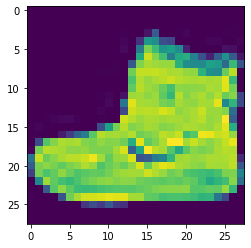

In [6]:
plt.imshow(x_train[0]);

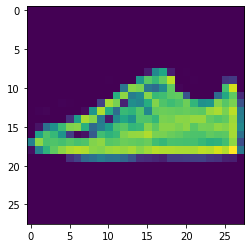

In [7]:
plt.imshow(x_train[1212]);

------

## Preprocessing the Data

### Normalisation

In [8]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [9]:
x_train = x_train/255
x_test =  x_test/255

In [10]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

### Reshaping

In [11]:
x_train[0].shape

(28, 28)

In [12]:
len(x_train), len(x_test)

(60000, 10000)

In [13]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
x_train[0].shape

(28, 28, 1)

### One-hot encoding  

In [17]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)

## Model


In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

--------

## Training the Model


In [22]:
x_train.shape, y_cat_train.shape

((60000, 28, 28, 1), (60000, 10))

In [23]:
x_test.shape, y_cat_test.shape

((10000, 28, 28, 1), (10000, 10))

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [ ]:
fitted_model = model.fit(x=x_train, y=y_cat_train,
             validation_data=(x_test, y_cat_test),
             callbacks=[early_stopping],
             epochs=15,
             verbose=1)

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.4787 - accuracy: 0.8249 - val_loss: 0.4064 - val_accuracy: 0.8527
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3187 - accuracy: 0.8823 - val_loss: 0.3572 - val_accuracy: 0.8718
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2820 - accuracy: 0.8970 - val_loss: 0.3061 - val_accuracy: 0.8919
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2586 - accuracy: 0.9076 - val_loss: 0.3192 - val_accuracy: 0.8885
Epoch 5/10
 995/1875 [==============>...............] - ETA: 28s - loss: 0.2488 - accuracy: 0.9077

----------

## Evaluating the Model

In [ ]:
# model matrics
model.metrics_names  

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=0)

In [ ]:
metrics = pd.DataFrame(fitted_model.history)
metrics.head()

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot();

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.76      0.81      1000
           3       0.87      0.93      0.90      1000
           4       0.81      0.85      0.83      1000
           5       0.93      0.99      0.96      1000
           6       0.66      0.76      0.71      1000
           7       0.97      0.92      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Confusion Matrix
confusion_matrix(y_test, predictions)

array([[766,   7,  14,  31,   2,   2, 165,   0,  13,   0],
       [  0, 977,   1,  12,   3,   0,   5,   0,   2,   0],
       [ 19,   0, 755,  15, 103,   0, 108,   0,   0,   0],
       [ 10,   4,  13, 930,   8,   0,  31,   0,   4,   0],
       [  2,   1,  34,  44, 848,   2,  68,   0,   1,   0],
       [  0,   0,   0,   0,   0, 989,   0,   6,   1,   4],
       [ 64,   2,  45,  32,  85,   0, 755,   0,  17,   0],
       [  0,   0,   0,   0,   0,  41,   0, 915,   0,  44],
       [  1,   1,   4,   2,   0,   8,   6,   2, 976,   0],
       [  0,   0,   1,   0,   0,  16,   0,  17,   0, 966]], dtype=int64)

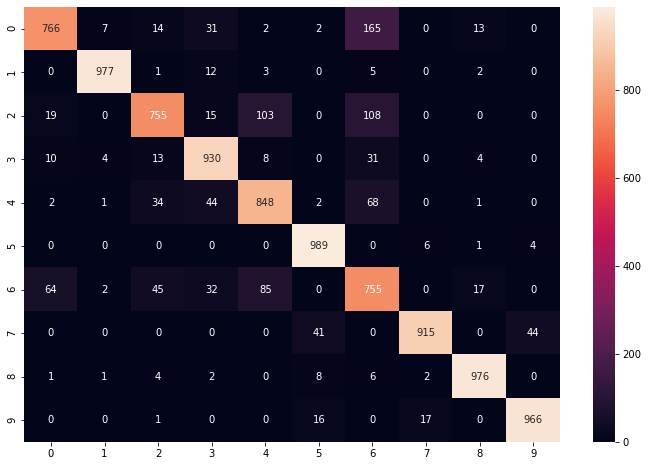

In [ ]:
#heatmap confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f');

# Great Job!